# Quiz 4 - Harris Corner Detector
#### Edson Roteia Araujo Junior e João Pedro Moreira Ferreira

### Instructions
- Implement algorithm HARRIS’ detector (page 84 Trucco and Verri).
- For each fixed pair of values of the algorithm parameters, measure the robustness of your implementation with synthetic images of squares corrupted by increasing amounts of Gaussian noise, as follows:
    - record the Root Mean Square (RMS) distance of the estimated corners from the true positions
    - the number of spurious corners
    - the number of missed corners. 
- Plot these values in three graphs, against the standard deviation of the noise. Compare with cv2.cornerHarris from OpenCV (https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html).

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

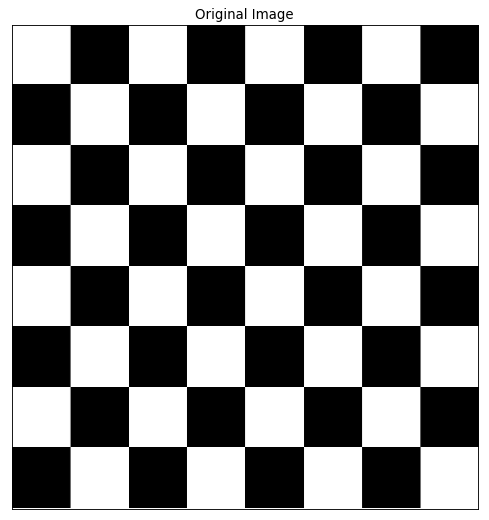

In [22]:
filename = 'imgs/chess.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.title('Original Image') 
plt.show()

### OpenCV implementation of Harris algorithm

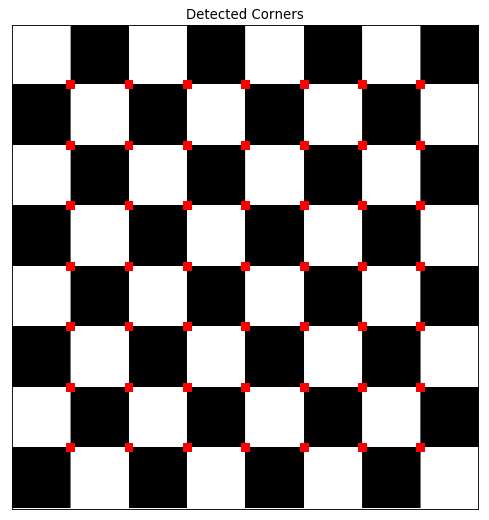

In [23]:
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,np.ones((5,5)),iterations = 5)

imgcorners = img.copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners[dst>0.01*dst.max()]=[0,0,255]
imgcorners = cv2.cvtColor(imgcorners, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(imgcorners)
plt.xticks([]),plt.yticks([])
plt.title('Detected Corners') 
plt.show()

### Creating Gaussian Noise

In [24]:
def applyGaussianNoise(img, sigma):
    row,col,ch = img.shape
    noise = np.random.normal(0,sigma,(row,col,ch))
    noise = noise.reshape(row,col,ch)
    img = img + noise
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


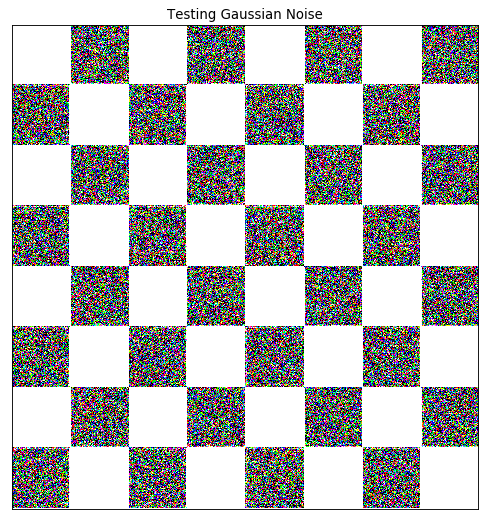

In [25]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(applyGaussianNoise(img, 1.5))
plt.xticks([]),plt.yticks([])
plt.title('Testing Gaussian Noise') 
plt.show()

### Implementation of Harris Algorithm 

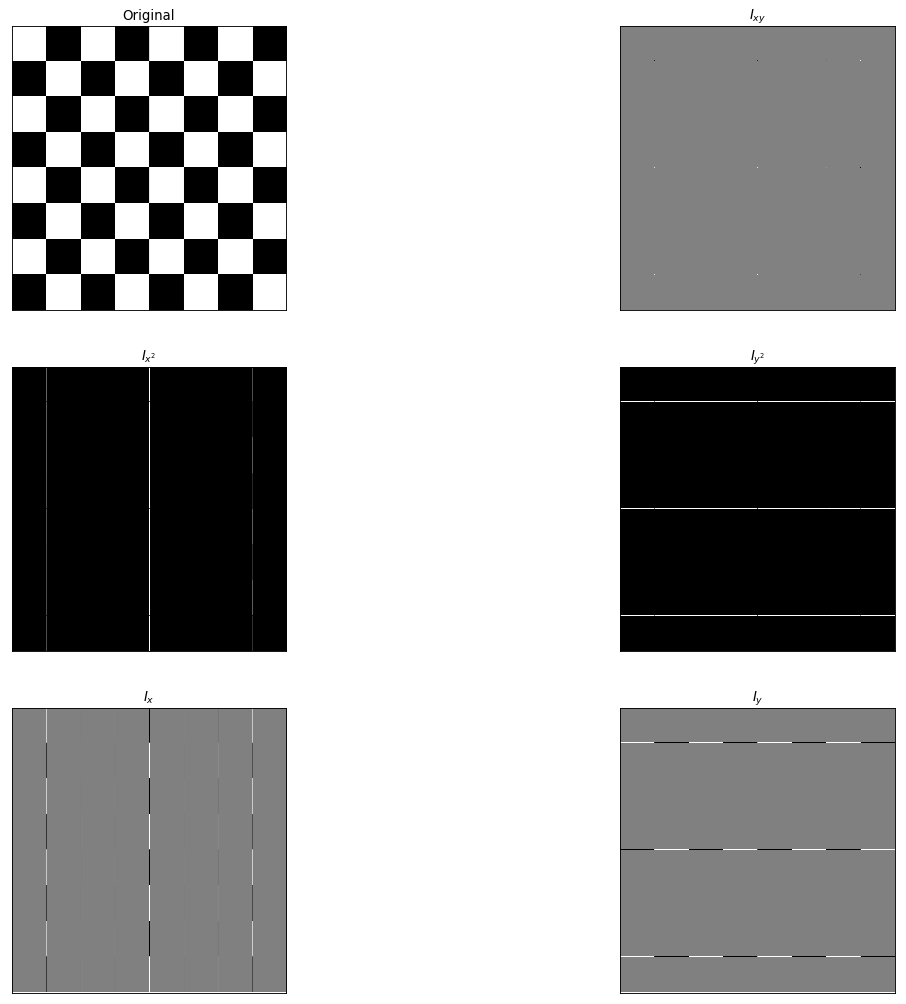

In [26]:
sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
I_x = cv2.filter2D(gray,-1,sobel_x)
I_y = cv2.filter2D(gray,-1,sobel_y)
I_xy = np.multiply(I_x,I_y)
I_x2 = np.multiply(I_x,I_x)
I_y2 = np.multiply(I_y,I_y)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(321),plt.imshow(gray, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(I_xy, cmap='gray')
plt.title('$I_{xy}$'), plt.xticks([]), plt.yticks([])

plt.subplot(323),plt.imshow(I_x2, cmap='gray')
plt.title('$I_{x^2}$'), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(I_y2, cmap='gray')
plt.title('$I_{y^2}$'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(I_x, cmap='gray')
plt.title('$I_x$'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(I_y, cmap='gray')
plt.title('$I_y$'), plt.xticks([]), plt.yticks([])
plt.show()

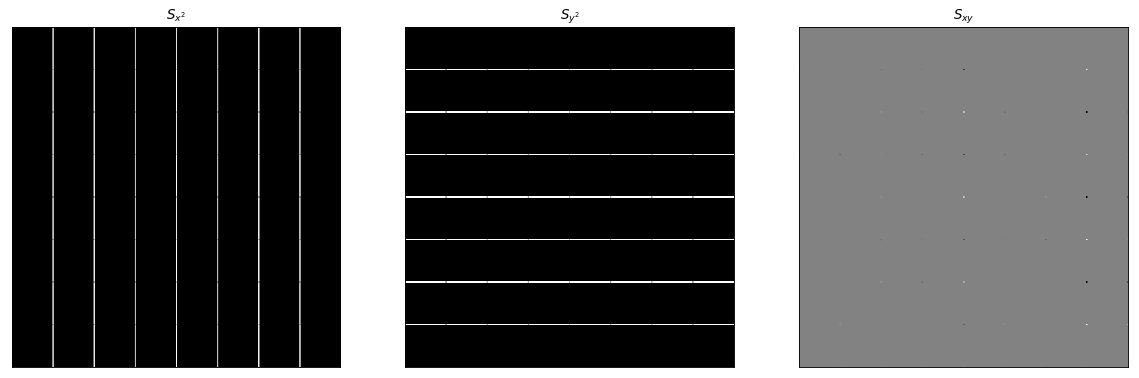

In [27]:
s_x2 = cv2.filter2D(I_x2,-1,np.ones((5,5))) 
s_y2 = cv2.filter2D(I_y2,-1,np.ones((5,5)))
s_xy = cv2.filter2D(I_xy,-1,np.ones((5,5)))

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(s_x2, cmap='gray')
plt.title('$S_{x^2}$'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(s_y2, cmap='gray')
plt.title('$S_{y^2}$'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(s_xy, cmap='gray')
plt.title('$S_{xy}$'), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
##SLIDES
#falta definir as contantes k e threshold
#falta computar supressao nao maxima no out
k = 0.04
threshold = 0.6
out = np.zeros(gray.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        C = None
        C = np.array([[s_x2[i][j],s_xy[i][j]],[s_y2[i][j],s_xy[i][j]]])
        R = np.linalg.det(C) - k*((np.trace(C))**2)
        if R > threshold:
            out[i][j] = 1.0
            
# Non-maximal Supression
# for c_i in range(2,img.shape[0] - 2):
#     for c_j in range(2, img.shape[1] - 2):
#         for i in range(c_i - 2, c_i + 2):
#             for j in range(c_j - 2, c_j + 2):
                

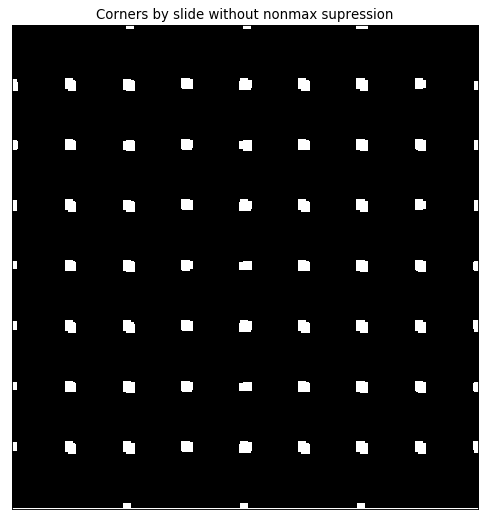

In [29]:
out = cv2.dilate(out,np.ones((5,5)),iterations = 5)


fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(out,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Corners by slide without nonmax supression') 
plt.show()

In [30]:
###BOOK CODE
k = 0.04
out = np.zeros(gray.shape)
possible_corners = []
dtype=[('eig', float), ('i', int), ('j', int)]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        C = None
        C = np.array([[s_x2[i][j],s_xy[i][j]],[s_y2[i][j],s_xy[i][j]]])
        smallest_eigen_value = np.min(np.linalg.eig(C)[0])
        if smallest_eigen_value > threshold:
            possible_corners.append((smallest_eigen_value,i,j))
possible_corners = np.array(possible_corners,dtype=dtype)
possible_corners = np.sort(possible_corners, order='eig')   

/anaconda3/envs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


In [42]:
todelete = []
corners = []
for idx,(eig,i,j) in enumerate(possible_corners):
    flag = 0
    for i_aux,j_aux in corners:
        if abs(i-i_aux) < 5 and abs(j-j_aux) < 5:
            todelete.append(idx)
            flag = 1
            break
        else:
            pass
#             possible_corners = np.delete(possible_corners,idx)
    if flag == 0:
        corners.append([i,j])

In [43]:
todelete = np.unique(np.array(todelete))
# todelete
print (len(todelete),len(possible_corners),len(possible_corners)-len(todelete))
# for idx in enumerate(possible_corners):
#     if idx in todelete
corners = possible_corners.copy()
corners = np.delete(corners,todelete)

3448 3744 296


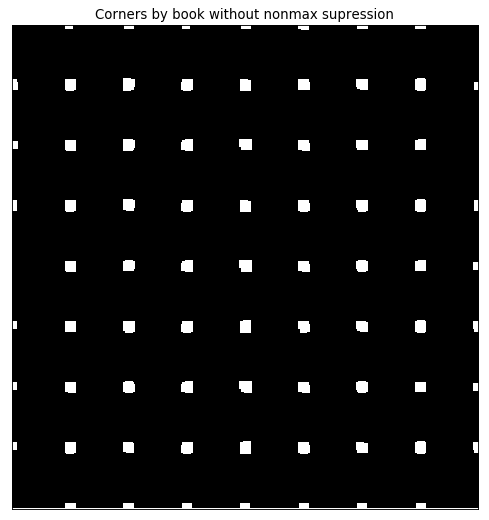

In [44]:
out_book = np.zeros(gray.shape)
for e,i,j in corners:
    out_book[i][j] = 1.0
out_book = cv2.dilate(out_book,np.ones((5,5)),iterations = 5)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(out_book,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Corners by book without nonmax supression') 
plt.show()

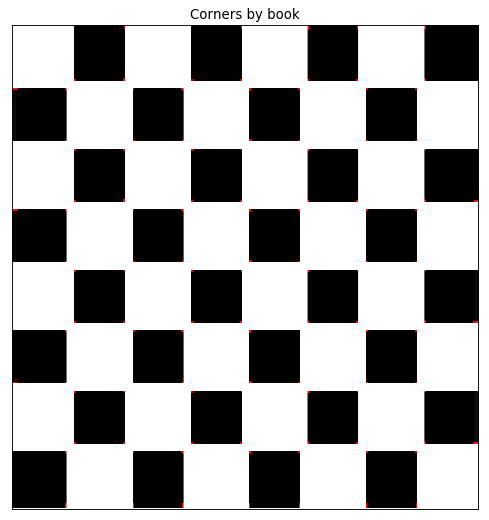

In [45]:
out_book_2 = img.copy()
for e,i,j in corners:
    out_book_2[i][j][0] = 255
    
out_book_2 = cv2.dilate(out_book_2,np.ones((5,5)),iterations = 5)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(out_book_2)
plt.xticks([]),plt.yticks([])
plt.title('Corners by book') 
plt.show()

In [46]:
out_book_2.shape

(1280, 1236, 3)